In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error

df=pd.read_csv(r"C:\Users\kavin\OneDrive\Desktop\svm and decision tree\student_exam_tree.csv")
df

,hours_studied,sleep_hours,attendance,pass_fail
0,6.82,4.1,63.8,1
1,0.54,5.7,77.7,1
2,2.20,7.3,76.9,1
3,1.84,5.3,71.6,0
4,1.76,7.3,67.7,0
...,...,...,...,...
145,7.85,6.2,82.0,1
146,8.95,5.5,92.7,1
147,4.61,8.4,94.0,1
148,0.38,5.8,63.7,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hours_studied  150 non-null    float64
 1   sleep_hours    150 non-null    float64
 2   attendance     150 non-null    float64
 3   pass_fail      150 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 4.8 KB


In [47]:
df.isnull().sum()

hours_studied    0
sleep_hours      0
attendance       0
pass_fail        0
dtype: int64

In [48]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='hours_studied', ylabel='Count'>

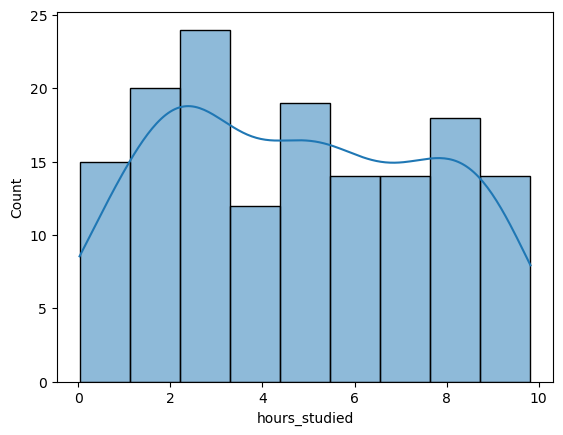

In [49]:
sns.histplot(df["hours_studied"], kde=True)

<Axes: xlabel='sleep_hours', ylabel='Count'>

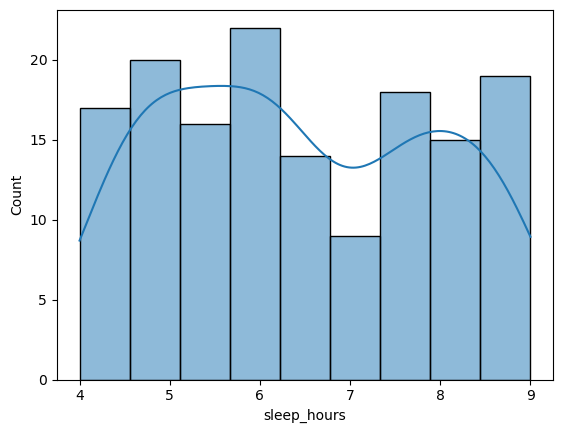

In [50]:
sns.histplot(df["sleep_hours"], kde=True)

<Axes: xlabel='attendance', ylabel='Count'>

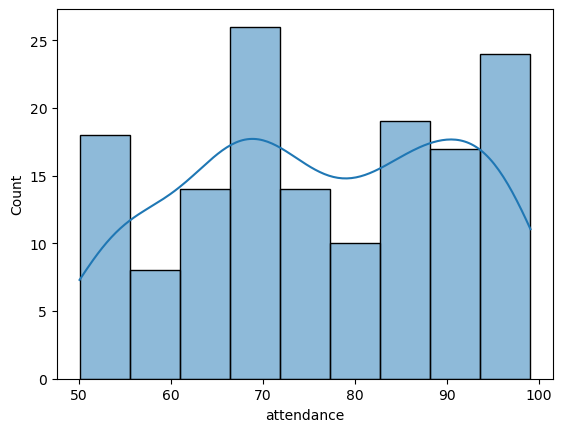

In [51]:
sns.histplot(df["attendance"], kde=True)

<Axes: >

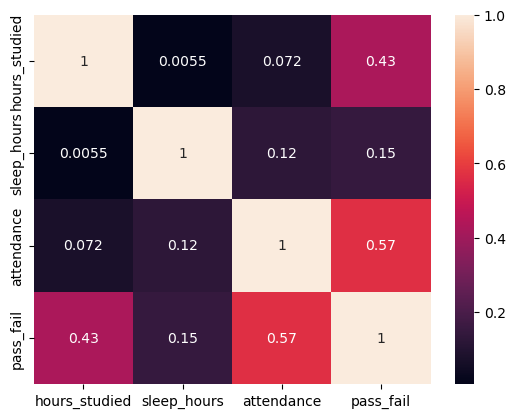

In [67]:
sns.heatmap(df.corr(),annot=True)

In [63]:
cols = ["hours_studied", "sleep_hours", "attendance"]

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    print(f"\nOutliers in {col}:\n", outliers.values)


Outliers in hours_studied:
 []

Outliers in sleep_hours:
 []

Outliers in attendance:
 []


In [64]:
X = df[["hours_studied", "sleep_hours", "attendance"]]
y = df["pass_fail"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [55]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [59]:
y_pred = model.predict(X_test_scaled)

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)

print("Accuracy:", acc*100,"%")
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

Accuracy: 100.0 %
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [73]:
y_pred=model.predict(X_test)
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",root_mean_squared_error(y_test,y_pred))
print("r2_score:",r2_score(y_test,y_pred))

Mean Squared Error: 0.15555555555555556
Root Mean Squared Error: 0.39440531887330776
r2_score: -0.18421052631578916


c:\Users\kavin\anaconda4\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


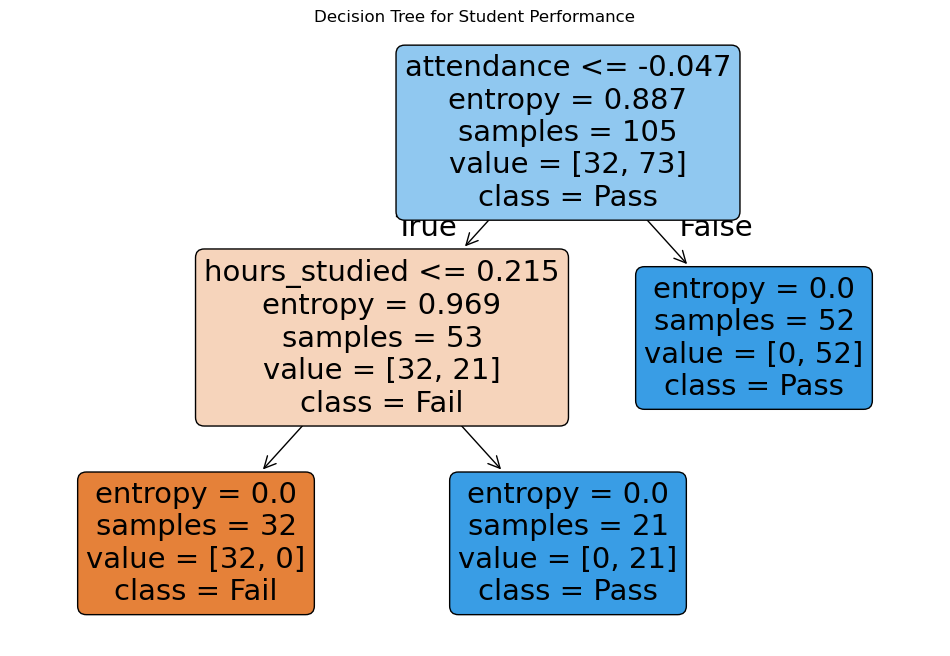

In [76]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=["Fail", "Pass"], filled=True, rounded=True)
plt.title("Decision Tree for Student Performance")
plt.savefig("decision_tree.png") 
plt.show()

In [66]:
new_student = [[8, 6, 80]]
prediction = model.predict(new_student)
print("Pass" if prediction[0]==1 else "Fail")

Pass


In [75]:
import pickle

with open("destree_model.sav", "wb") as f:
    pickle.dump((model, scaler), f)

with open("destree_model.sav", "rb") as f:
    loaded_model, loaded_scaler = pickle.load(f)